In [1]:
!pip install pandas numpy matplotlib statsmodels scipy seaborn yfinance pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.9 MB/s eta 0:00:00


In [2]:
#@title Library
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced plots
import statsmodels.api as sm  # For ARIMA and statistical tests
from statsmodels.tsa.stattools import adfuller  # Augmented Dickey-Fuller test for stationarity
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # ACF/PACF plots
from statsmodels.tsa.arima.model import ARIMA  # ARIMA model
from scipy.stats import zscore  # For data normalization if needed
import yfinance as yf  # To fetch cryptocurrency data
import pmdarima as pm  # Auto ARIMA for model selection
from sklearn.metrics import mean_squared_error  # RMSE for model evaluation


In [43]:
#@title File Loader
file_path = "ethereum_data.csv"
df = pd.read_csv(file_path, skiprows=2)  # Skip both rows
df.columns = ['date', 'close', 'high', 'low', 'open', 'volume']
print(df.head())

         date       close        high         low        open      volume
0  2019-03-09  137.965332  139.119415  134.677124  134.887558  5011918715
1  2019-03-10  136.758682  138.270309  135.685684  138.180496  4578438499
2  2019-03-11  133.834030  137.353409  133.102798  136.849533  4689807419
3  2019-03-12  134.442886  135.273468  130.944153  134.012848  4709988000
4  2019-03-13  133.263077  134.611771  132.719727  134.611771  4265162099


In [44]:
df.head()

,date,close,high,low,open,volume
0,2019-03-09,137.965332,139.119415,134.677124,134.887558,5011918715
1,2019-03-10,136.758682,138.270309,135.685684,138.180496,4578438499
2,2019-03-11,133.834030,137.353409,133.102798,136.849533,4689807419
3,2019-03-12,134.442886,135.273468,130.944153,134.012848,4709988000
4,2019-03-13,133.263077,134.611771,132.719727,134.611771,4265162099


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1827 non-null   object 
 1   close   1827 non-null   float64
 2   high    1827 non-null   float64
 3   low     1827 non-null   float64
 4   open    1827 non-null   float64
 5   volume  1827 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 85.8+ KB


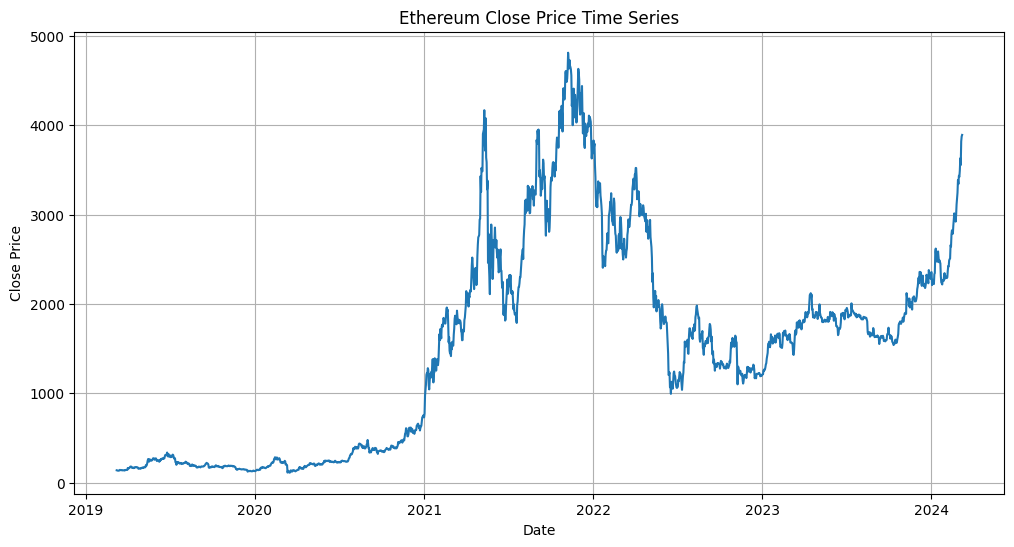

In [46]:
#@title Price Plot
# Convert the 'date' column to datetime objects if it's not already
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df = df.set_index('date')

# Plot the time series
plt.figure(figsize=(12, 6))
sns.lineplot(data=df2['close'])  # Plotting the 'close' price
plt.title('Ethereum Close Price Time Series')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [47]:
df.head()

,close,high,low,open,volume
date,,,,,
2019-03-09,137.965332,139.119415,134.677124,134.887558,5011918715
2019-03-10,136.758682,138.270309,135.685684,138.180496,4578438499
2019-03-11,133.834030,137.353409,133.102798,136.849533,4689807419
2019-03-12,134.442886,135.273468,130.944153,134.012848,4709988000
2019-03-13,133.263077,134.611771,132.719727,134.611771,4265162099


In [50]:
df.shape

(1827, 5)

In [51]:
#@title checking null
# Check for missing values
print(df.isnull().sum())

# Check data types of each column
print(df.dtypes)

# Statistical summary of numerical columns
print(df.describe())


close     0
high      0
low       0
open      0
volume    0
dtype: int64
close     float64
high      float64
low       float64
open      float64
volume      int64
dtype: object
             close         high          low         open        volume
count  1827.000000  1827.000000  1827.000000  1827.000000  1.827000e+03
mean   1503.785963  1543.762939  1457.144696  1501.934629  1.470190e+10
std    1165.205607  1198.873755  1127.043945  1164.761554  9.852809e+09
min     110.605873   116.021622    95.184303   110.406784  2.081626e+09
25%     264.408020   270.333740   252.704811   263.891251  7.688643e+09
50%    1579.704590  1625.911499  1550.415527  1577.884033  1.229220e+10
75%    2192.532715  2258.296021  2099.042114  2189.227661  1.863817e+10
max    4812.087402  4891.704590  4718.039062  4810.071289  8.448291e+10


In [53]:
# --- Feature Engineering ---

# Calculate daily percentage change (Price)
df['Daily_Pct_Change_Price'] = df['close'].pct_change()

# Calculate daily percentage change (Volume)
df['Daily_Pct_Change_Volume'] = df['volume'].pct_change()

# Calculate 7-day rolling percentage change (Price)
df['Rolling_7D_Pct_Change_Price'] = (df['Daily_Pct_Change_Price'] + 1).rolling(window=7).apply(lambda x: x.prod()) - 1


# Calculate 7-day rolling percentage change (Volume)
df['Rolling_7D_Pct_Change_Volume'] = (df['Daily_Pct_Change_Volume'] + 1).rolling(window=7).apply(lambda x: x.prod()) - 1

# Handle the initial NaNs created by pct_change and rolling
#df.fillna(method='bfill', inplace=True) # Backfill for the first few rows.
#check for infinity
print(df.isnull().sum())


print(df.head(10)) #show first 10

close                           0
high                            0
low                             0
open                            0
volume                          0
Daily_Pct_Change_Price          1
Daily_Pct_Change_Volume         1
Rolling_7D_Pct_Change_Price     7
Rolling_7D_Pct_Change_Volume    7
dtype: int64
                 close        high         low        open      volume  \
date                                                                     
2019-03-09  137.965332  139.119415  134.677124  134.887558  5011918715   
2019-03-10  136.758682  138.270309  135.685684  138.180496  4578438499   
2019-03-11  133.834030  137.353409  133.102798  136.849533  4689807419   
2019-03-12  134.442886  135.273468  130.944153  134.012848  4709988000   
2019-03-13  133.263077  134.611771  132.719727  134.611771  4265162099   
2019-03-14  133.711594  135.180847  132.750076  133.203903  4476532147   
2019-03-15  137.691788  138.395142  133.567154  133.567154  4506861856   
2019-03-16  142

In [57]:
df.tail(7)

,close,high,low,open,volume,Daily_Pct_Change_Price,Daily_Pct_Change_Volume,Rolling_7D_Pct_Change_Price,Rolling_7D_Pct_Change_Volume
date,,,,,,,,,
2024-03-02,3422.049805,3459.747314,3398.898926,3436.159180,12024340617,-0.003786,-0.287662,0.143586,0.123593
2024-03-03,3490.993652,3491.168457,3372.214111,3422.875244,13643324467,0.020147,0.134642,0.121533,-0.066833
2024-03-04,3630.433838,3641.459229,3446.017578,3489.340088,26772963830,0.039943,0.962349,0.142007,0.529493
2024-03-05,3554.964600,3828.159668,3224.119385,3631.928955,47706899137,-0.020788,0.781906,0.095683,1.262029
2024-03-06,3819.226318,3901.434326,3502.802490,3554.067871,34938642613,0.074336,-0.267640,0.128045,0.062420
2024-03-07,3874.347656,3939.593994,3738.685303,3818.311035,22457177587,0.014433,-0.357240,0.159318,-0.211176
2024-03-08,3892.061035,3998.826416,3828.363281,3874.830811,26135487051,0.004572,0.163792,0.133042,0.548301


In [58]:
# Calculate daily percentage change (Price)
df['daily_pct_change_price'] = df['close'].pct_change()

# Calculate daily percentage change (Volume)
df['daily_pct_change_volume'] = df['volume'].pct_change()

# Calculate 7-day rolling percentage change (Price)
df['rolling_7d_pct_change_price'] = (df['daily_pct_change_price'] + 1).rolling(window=7).apply(lambda x: x.prod()) - 1

# Calculate 7-day rolling percentage change (Volume)
df['rolling_7d_pct_change_volume'] = (df['daily_pct_change_volume'] + 1).rolling(window=7).apply(lambda x: x.prod()) - 1

# Handle the initial NaNs created by pct_change and rolling
df.fillna(method='bfill', inplace=True) # Backfill for the first few rows.
#check for infinity
print(df.isnull().sum())

print(df.head(10)) #show first 10

close                           0
high                            0
low                             0
open                            0
volume                          0
Daily_Pct_Change_Price          0
Daily_Pct_Change_Volume         0
Rolling_7D_Pct_Change_Price     0
Rolling_7D_Pct_Change_Volume    0
daily_pct_change_price          0
daily_pct_change_volume         0
rolling_7d_pct_change_price     0
rolling_7d_pct_change_volume    0
dtype: int64
                 close        high         low        open      volume  \
date                                                                     
2019-03-09  137.965332  139.119415  134.677124  134.887558  5011918715   
2019-03-10  136.758682  138.270309  135.685684  138.180496  4578438499   
2019-03-11  133.834030  137.353409  133.102798  136.849533  4689807419   
2019-03-12  134.442886  135.273468  130.944153  134.012848  4709988000   
2019-03-13  133.263077  134.611771  132.719727  134.611771  4265162099   
2019-03-14  133.711594  135

<ipython-input-58-6fa90ebec154>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True) # Backfill for the first few rows.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10553.728, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10533.353, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10538.369, Time=2.57 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10553.665, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10519.929, Time=0.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=10521.643, Time=0.56 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10521.268, Time=1.54 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10519.586, Time=0.68 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10522.085, Time=0.78 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10520.081, Time=0.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10520.796, Time=1.24 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=10519.986, Time=0.23 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 8.663 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  914
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -5255.793
Date:                Sun, 09 Mar 2025   AIC                          10519.586
Time:                        15:47:15   BIC                          10538.853
Sample:                    03-09-2019   HQIC                         10526.941
                         - 09-07-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.4482      4.336      1.487      0.137      -2.050

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RMSE: 1530.2428501273978


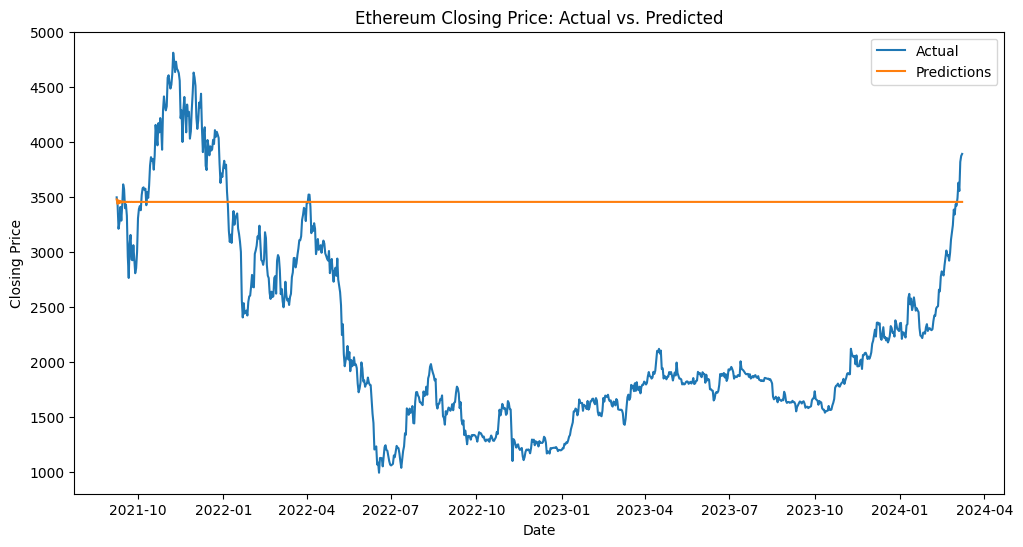

In [63]:
# --- Model Building (ARIMA with pmdarima) ---

# Split data into training and testing sets (80/20 split)
train_data = df[:-int(len(df)*0.5)]
test_data = df[-int(len(df)*0.5):]

# Use pmdarima to automatically find the best ARIMA parameters
# We'll use the 'close' price for the auto_arima model fitting
auto_arima_model = pm.auto_arima(train_data['close'],
                                  start_p=0, start_q=0,
                                  test='adf',       # Use adftest to find optimal 'd'
                                  max_p=5, max_q=5, # Maximum p and q
                                  m=1,              # Frequency of time series (1 for daily)
                                  d=None,           # Let model determine 'd'
                                  seasonal=False,   # No seasonality
                                  start_P=0,
                                  D=0,
                                  trace=True,
                                  error_action='ignore',
                                  suppress_warnings=True,
                                  stepwise=True)

print(auto_arima_model.summary())

# Fit the best model
best_model = ARIMA(train_data['close'], order=auto_arima_model.order)
best_model_fit = best_model.fit()

# --- Prediction and Evaluation ---

# Make predictions on the test set
predictions = best_model_fit.predict(start=len(train_data), end=len(df)-1)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['close'], predictions))
print(f'RMSE: {rmse}')

# Visualize predictions against actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data['close'], label='Actual')
plt.plot(predictions, label='Predictions')
plt.title('Ethereum Closing Price: Actual vs. Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()